<a href="https://colab.research.google.com/github/Gilade98/Machine_Learning_Projects/blob/main/The_DS_Toolbox/Ex2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [ ]:
import requests
from bs4 import BeautifulSoup
def hacker_news_titles(url):
  html = requests.get(url).content.decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
  titles = soup.findAll(attrs={'class': 'titleline'})
  scores = soup.findAll(attrs={'class': 'score'})
  title_score_pairs = [(title.get_text(), score.get_text()) for title, score in zip(titles, scores)]
  return title_score_pairs

In [ ]:
l=hacker_news_titles('http://news.ycombinator.com')
l

[('MIT engineers make converting CO2 into useful products more practical (news.mit.edu)',
  '74 points'),
 ('Show HN: Konga Beat – A custom track editor for Donkey Konga 2 and 3 (kongabeat.com)',
  '17 points'),
 ('From BSP to ESP – How S3ctor Abused Quake Editors to Redefine the Morrowind Mod (openmw.org)',
  '87 points'),
 ('No GPS required: our app can now locate underground trains (transitapp.com)',
  '761 points'),
 ('A Mathematician in a School of Art (mathvalues.org)', '58 points'),
 ('Covering the Supreme Court and the Judiciary in (Mostly) Plain English (amylhowe.com)',
  '7 points'),
 ('Show HN: Bluetooth USB Peripheral Relay – Bridge Bluetooth Devices to USB (github.com/bahaaador)',
  '152 points'),
 ('Patterns (YC S21) Is Hiring to Transform Business Finance and Credit (patterns-ai.notion.site)',
  '21 points'),
 ('Fault Injection – Down the Rabbit Hole (humanativaspa.it)', '25 points'),
 ('Show HN: A simple image puzzle generator (puzzlip.com)', '46 points'),
 ('Study show

**Question 2**:  Write a function that collects data on four Marvel movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
!pip install tmdbv3api

In [ ]:
from re import search
from tmdbv3api import TMDb, Movie

def get_marvel_movies(api_key):
    # Initialize TMDb and Movie
    tmdb = TMDb()
    tmdb.api_key = api_key
    movie = Movie()

    # Search for movies with "Marvel" in the title
    search_results = movie.search('Marvel')

    marvel_data = []
    for i in range(4):
        movie_data = search_results[i]
        marvel_data.append({
            'title': movie_data.title,
            'release_date': movie_data.release_date,
            'overview': movie_data.overview,
            'vote_average': movie_data.vote_average,
            'popularity': movie_data.popularity
        })

    return marvel_data

In [ ]:
l = get_marvel_movies('')
l

[{'title': 'Marvel',
  'release_date': '1969-05-20',
  'overview': 'The quintessential student film of 1969.',
  'vote_average': 7.61,
  'popularity': 3.731},
 {'title': 'LEGO Marvel Avengers: Mission Demolition',
  'release_date': '2024-10-17',
  'overview': 'A young, aspiring hero and superhero fan inadvertently unleashes a powerful new villain looking to rid the world of the Avengers.',
  'vote_average': 7.0,
  'popularity': 175.367},
 {'title': 'The Marvels',
  'release_date': '2023-11-08',
  'overview': 'Carol Danvers, aka Captain Marvel, has reclaimed her identity from the tyrannical Kree and taken revenge on the Supreme Intelligence. But unintended consequences see Carol shouldering the burden of a destabilized universe. When her duties send her to an anomalous wormhole linked to a Kree revolutionary, her powers become entangled with that of Jersey City super-fan Kamala Khan, aka Ms. Marvel, and Carol’s estranged niece, now S.A.B.E.R. astronaut Captain Monica Rambeau. Together, 

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

**Note:** Use ks-projects-201801.csv data

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code
your_id  = ""
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 2 and 4


In [ ]:
import pandas as pd
#I have it on my drive from HW 1
df = pd.read_csv('/content/drive/MyDrive/Datasets/kickstarter-projects/ks-projects-201801.csv', encoding='ISO-8859-1')
print(df.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


**Question 1:** On average which project category received the lowest number of backers? (15 pt)

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

In [ ]:
df = df[['category','usd pledged']]
df2 = df.groupby('category').mean().sort_values(by='usd pledged').reset_index()
lowest_avg_category = df2['category'][0]
print("Category with the lowest average score:", lowest_avg_category)

Category with the lowest average score: Crochet


**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

<ipython-input-42-790ff8e7385d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df2, x='category', y='usd pledged', palette='viridis')


([<matplotlib.axis.XTick at 0x7b0f572b28c0>,
 [Text(0, 0, 'Crochet'),
  Text(10, 0, 'Young Adult'),
  Text(20, 0, 'Bacon'),
  Text(30, 0, 'Live Games'),
  Text(40, 0, 'Food Trucks'),
  Text(50, 0, 'Residencies'),
  Text(60, 0, 'Web'),
  Text(70, 0, 'Romance'),
  Text(80, 0, 'World Music'),
  Text(90, 0, 'Thrillers'),
  Text(100, 0, 'Jazz'),
  Text(110, 0, 'Puzzles'),
  Text(120, 0, 'Makerspaces'),
  Text(130, 0, 'Anthologies'),
  Text(140, 0, 'Design'),
  Text(150, 0, 'Robots')])

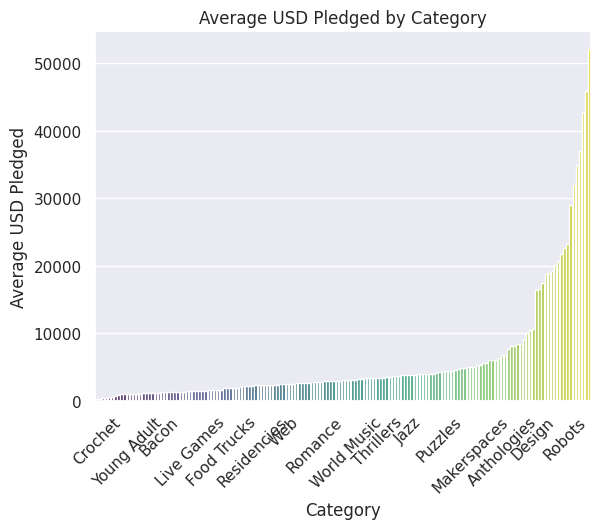

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
ax = sns.barplot(data=df2, x='category', y='usd pledged', palette='viridis')
ax.set(title="Average USD Pledged by Category", xlabel="Category", ylabel="Average USD Pledged")
# Adjust x-axis labels: Show only every 10
plt.xticks(ticks=range(0, len(df2), 10), labels=df2['category'][::10], rotation=45)

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  **Pandas**, please answer the following questions:

**Question 1:** Write code which calculate the top-20 most friendly characters, i.e., characters with the
    highest number of friends. Please use _hero_network.csv_ file (15pt).
    
**Note:** Not all the links in this dataset are symmetric.

In [ ]:
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "The Marvel Universe Social Network"

ref                                                    title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
csanhueza/the-marvel-universe-social-network           The Marvel Universe Social Network          3MB  2017-01-28 11:28:49          23756        242  0.9705882        
trnguyen1510/the-marvel-comic-characters-partnerships  The Marvel Comic Characters Partnerships    7KB  2021-07-01 22:54:28            511          6  0.88235295       
mexwell/marvel-socal-network                           🦸‍♂️ Marvel Socal Network                 535KB  2024-07-19 07:52:15              7          0  0.8235294        


In [ ]:
!kaggle datasets download csanhueza/the-marvel-universe-social-network  -p /content/drive/MyDrive/Datasets
!unzip /content/drive/MyDrive/Datasets/the-marvel-universe-social-network.zip -d /content/drive/MyDrive/Datasets/the-marvel-universe-social-network/

Dataset URL: https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network
License(s): Attribution 3.0 Unported (CC BY 3.0)
 73% 2.00M/2.72M [00:00<00:00, 2.85MB/s]
100% 2.72M/2.72M [00:00<00:00, 3.19MB/s]
Archive:  /content/drive/MyDrive/Datasets/the-marvel-universe-social-network.zip
  inflating: /content/drive/MyDrive/Datasets/the-marvel-universe-social-network/edges.csv  
  inflating: /content/drive/MyDrive/Datasets/the-marvel-universe-social-network/hero-network.csv  
  inflating: /content/drive/MyDrive/Datasets/the-marvel-universe-social-network/nodes.csv  


In [ ]:
!ls /content/drive/MyDrive/Datasets/the-marvel-universe-social-network/

edges.csv  hero-network.csv  nodes.csv


In [ ]:
import pandas as pd
heroes = pd.read_csv('/content/drive/MyDrive/Datasets/the-marvel-universe-social-network/hero-network.csv')
print(heroes.columns)

Index(['hero1', 'hero2'], dtype='object')


In [ ]:
def top_k_friendly(k):
  # Count friendships initiated by hero1
    count_hero1 = heroes.groupby('hero1').count().reset_index()
    count_hero1.columns = ['hero', 'friends']

    # Count friendships where hero2 is the friend
    count_hero2 = heroes.groupby('hero2').count().reset_index()
    count_hero2.columns = ['hero', 'friends']

    # Combine counts from both hero1 and hero2 columns by summing the counts
    total_friend_count = pd.concat([count_hero1, count_hero2]) \
                          .groupby('hero', as_index=False) \
                          .sum()

    # Sort by the number of friends in descending order
    top_k_friendly_characters = total_friend_count.sort_values(by='friends', ascending=False).reset_index(drop=True).head(k)
    return top_k_friendly_characters

top_k_friendly(20)

,hero,friends
0,CAPTAIN AMERICA,16499
1,SPIDER-MAN/PETER PAR,13717
2,IRON MAN/TONY STARK,11817
3,THOR/DR. DONALD BLAK,11427
4,THING/BENJAMIN J. GR,10681
5,WOLVERINE/LOGAN,10353
6,HUMAN TORCH/JOHNNY S,10237
7,SCARLET WITCH/WANDA,9911
8,MR. FANTASTIC/REED R,9775
9,VISION,9696


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [ ]:
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

nodes = pd.read_csv('/content/drive/MyDrive/Datasets/the-marvel-universe-social-network/nodes.csv')
print(nodes.columns)
print(nodes['type'].unique())

Index(['node', 'type'], dtype='object')
['comic' 'hero']


In [ ]:
top_150_friendly = top_k_friendly(150)
top_150_friendly_list = top_150_friendly['hero'].tolist()
filtered_nodes = nodes[nodes['node'].isin(top_150_friendly_list)]
filtered_heroes = heroes[heroes['hero1'].isin(top_150_friendly_list) & heroes['hero2'].isin(top_150_friendly_list)]
filtered_heroes.drop_duplicates(inplace=True)
filtered_heroes.reset_index(drop=True, inplace=True)
filtered_heroes

<ipython-input-16-d05b48c27043>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_heroes.drop_duplicates(inplace=True)


,hero1,hero2
0,IRON MAN IV/JAMES R.,IRON MAN/TONY STARK
1,MYSTIQUE/RAVEN DARKH,BLOB/FRED J. DUKES
2,MYSTIQUE/RAVEN DARKH,ROGUE /
3,ROGUE /,BLOB/FRED J. DUKES
4,NOVA/RICHARD RIDER,FIRESTAR/ANGELICA JO
...,...,...
14244,SUNSPOT/ROBERTO DACO,WASP/JANET VAN DYNE
14245,MIRAGE II/DANIELLE M,WASP/JANET VAN DYNE
14246,MIRAGE II/DANIELLE M,SCARLET WITCH/WANDA
14247,MAGIK/ILLYANA RASPUT,WASP/JANET VAN DYNE


In [ ]:
# Create a graph
G = nx.Graph()

# Add nodes with type information
for _, row in filtered_nodes.iterrows():
    G.add_node(row['node'],type=row['type'])

# Add edges (relationships)
for _, row in filtered_heroes.iterrows():
    G.add_edge(row['hero1'], row['hero2'])

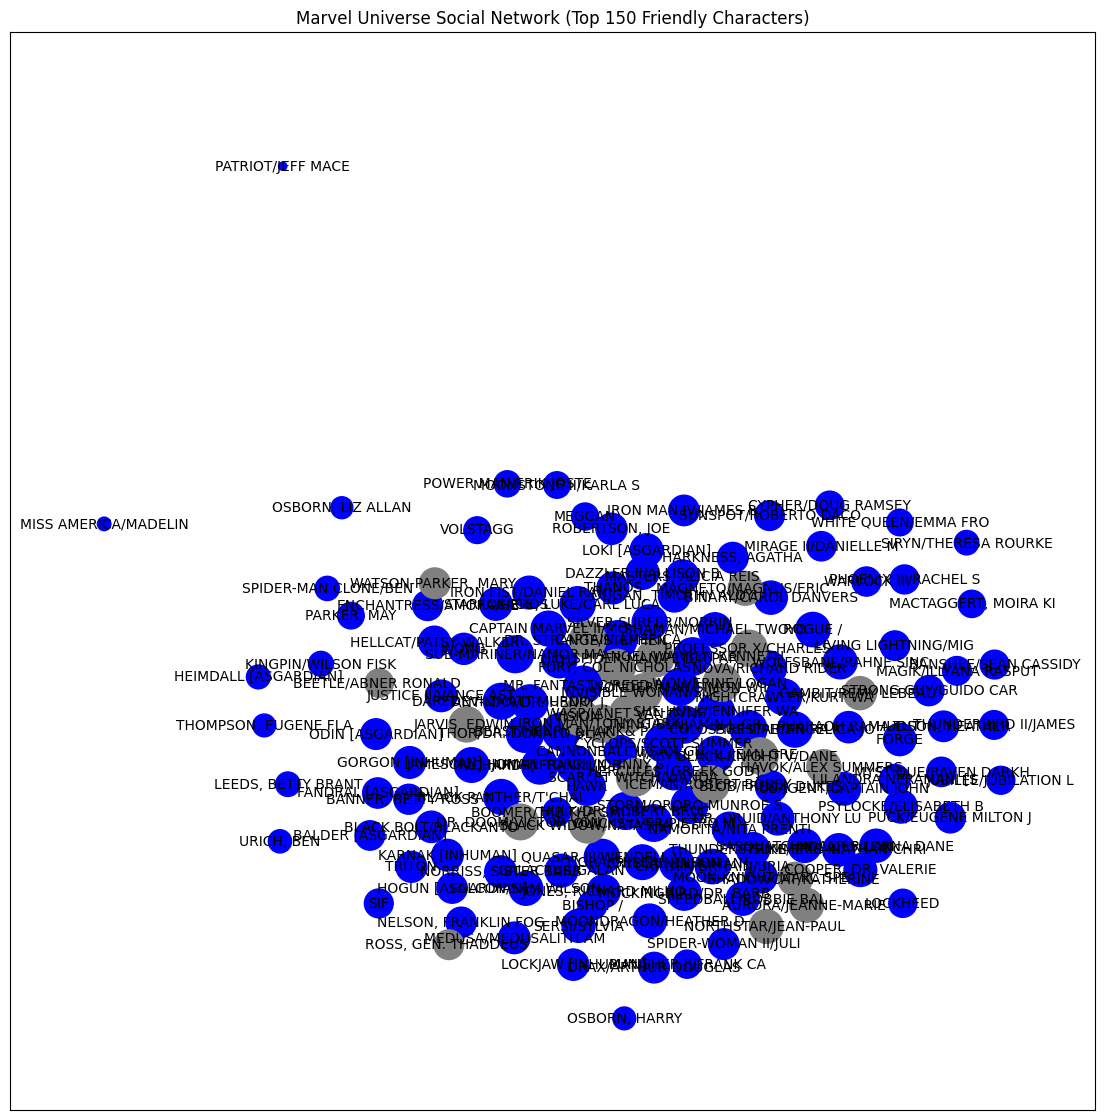

In [ ]:
# Draw the graph with node size proportional to degree (number of relationships)
node_sizes = [G.degree[node] *5  for node in G.nodes()]  # Adjust scale for better visibility

# Assign colors based on node type
node_colors = []
for node in G.nodes():
    node_type = G.nodes[node].get('type')
    if node_type == 'hero':
        node_colors.append('blue')  # Hero nodes are blue
    elif node_type == 'comic':
        node_colors.append('green')  # Comic nodes are green
    else:
        node_colors.append('gray')  # Fallback color for unknown type

# Create the plot
plt.figure(3,figsize=(14, 14))

positions = nx.spring_layout(G, seed=42, k=1, scale=10)
# Draw nodes with specified colors and sizes
nx.draw_networkx_nodes(G, pos=positions, node_size=node_sizes, node_color=node_colors)

# Draw edges with white color
nx.draw_networkx_edges(G, pos=positions, edge_color='white')

# Draw labels
nx.draw_networkx_labels(G, pos=positions, font_size=10, font_color='black')

# Show the plot
plt.title(f'Marvel Universe Social Network (Top 150 Friendly Characters)')
plt.show()

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) or [D3](https://d3js.org) (10pt)